In [1]:
f = open('bioDBnet_db2db_240214030437_1079846119.txt', 'r')
lines = f.readlines()

ensembl_items = list()
for line in lines[1:]:
    items = line.split('\t')[1]
    if items == '-': continue
    items = items.split(';')
    for item in items:
        item = item.strip()
        try:
            if item != '': ensembl_items.append(int(item.replace('ENSP','')))
        except:
            pass

len(ensembl_items)

3950

In [2]:
import numpy as np
import random
random.seed(42)

vectors = list()
ids = list()
labels = list()

f = open("./300.emb", 'r')
lines = f.readlines()

X = []
y = []


for line in lines[1:]:
    line = list(map(float, line.split()))
    key = int(line[0])
    value = np.array(line[1:])
    
    vectors.append(value)
    ids.append(key)
    labels.append(0)
    
    if key in ensembl_items:
        labels[-1] = 1
        X.append(value)
        y.append(1)
    else:
        if random.random() > 0.9:
            X.append(value)
            y.append(0)
vectors = np.array(vectors)
X = np.array(X)

In [3]:
len(ids)

19333

In [4]:
key2val = {i:v for i, v in zip(ids, vectors)}

In [5]:
print(f'# of targets: {y.count(1)}\n# of non-targets: {y.count(0)}\n# of dataset: {len(y)}')

# of targets: 611
# of non-targets: 1874
# of dataset: 2485


In [6]:
f = open('bioDBnet_db2db_240214030437_1079846119.txt', 'r')
lines = f.readlines()

n = 0

ensembl_items = list()
for line in lines[1:]:
    items = line.split('\t')[1]
    if items == '-': continue
    items = items.split(';')
    
    for item in items:
        item = item.strip()
        try:
            if item != '':
                if int(item.replace('ENSP','')) in ids:
                       n += 1
                       break
        except:
            pass

print(n)

605


In [7]:
import pandas as pd
df = pd.DataFrame(X)
df['target'] = y
df

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,target
0,-0.448467,0.095233,-0.092821,-0.134107,-0.007139,-0.131418,-0.018854,-0.078034,-0.056951,0.079432,...,0.155722,-0.270398,-0.155975,-0.007791,-0.089031,-0.249334,0.003843,0.339002,0.127911,1
1,-0.428154,-0.007177,0.029576,0.044989,0.117377,-0.221237,0.174119,0.034582,-0.058022,-0.007446,...,-0.018462,-0.328587,0.024882,-0.084731,0.079094,-0.306129,-0.244286,0.330961,0.261111,1
2,-0.407932,-0.018868,-0.134833,-0.174712,0.095473,0.028069,0.114519,-0.071687,-0.088949,0.003823,...,-0.022977,-0.111371,0.134170,-0.120238,-0.106024,-0.409875,-0.219931,0.202876,0.110316,1
3,-0.371262,0.261849,0.107960,-0.043823,0.177638,-0.135514,0.155902,-0.067005,-0.084844,0.071201,...,0.053447,-0.384257,0.247696,-0.221882,0.061141,-0.474955,-0.054627,0.063028,0.062447,1
4,-0.507152,-0.051490,0.026701,-0.201108,-0.173232,-0.038025,0.054581,-0.100011,-0.102310,-0.041454,...,0.066278,-0.176834,0.234495,-0.083268,0.150468,-0.438854,-0.114384,0.249722,0.150427,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2480,-0.102870,0.072078,0.081175,-0.076099,0.021010,-0.004609,0.097550,0.022653,-0.164863,0.046336,...,0.002224,-0.028217,0.031897,-0.017697,0.083695,-0.179492,-0.071681,0.173107,0.223553,0
2481,-0.083983,0.006300,0.091878,-0.070059,0.144563,-0.033152,0.112934,0.037304,-0.062191,0.042588,...,0.114456,0.022189,-0.055828,0.212664,0.005290,-0.195450,-0.037212,0.269580,0.246571,0
2482,-0.067637,0.043687,0.100857,0.005801,0.034378,0.088670,0.057131,0.031610,-0.156958,-0.006033,...,-0.014985,0.041633,0.096781,0.194243,0.098788,-0.210894,-0.100574,0.259159,0.282600,0
2483,-0.111868,0.080940,0.144521,0.034577,0.012373,0.054386,0.111830,0.023605,-0.156973,-0.009642,...,0.129242,0.052312,-0.062477,0.022660,0.007310,-0.160054,-0.162580,0.139309,0.133637,0


In [8]:
from pycaret.classification import *

clf = setup(data = df, target = 'target', session_id=123)
compare_models(fold=10, sort='F1')

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(2485, 129)"
4,Transformed data shape,"(2485, 129)"
5,Transformed train set shape,"(1739, 129)"
6,Transformed test set shape,"(746, 129)"
7,Numeric features,128
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8418,0.9119,0.8574,0.6343,0.7280,0.6204,0.6354,0.0040
qda,Quadratic Discriminant Analysis,0.8608,0.8931,0.7477,0.7057,0.7251,0.6322,0.6334,0.0060
svm,SVM - Linear Kernel,0.8487,0.0000,0.7849,0.6636,0.7181,0.6158,0.6209,0.0870
lightgbm,Light Gradient Boosting Machine,0.8660,0.9296,0.6916,0.7513,0.7174,0.6301,0.6330,0.3090
lda,Linear Discriminant Analysis,0.8579,0.9099,0.6985,0.7197,0.7073,0.6137,0.6151,0.0070
lr,Logistic Regression,0.8602,0.9226,0.6823,0.7353,0.7058,0.6146,0.6167,0.1760
xgboost,Extreme Gradient Boosting,0.8637,0.9207,0.6611,0.7581,0.7037,0.6160,0.6202,0.0620
ridge,Ridge Classifier,0.8585,0.0000,0.6588,0.7427,0.6966,0.6050,0.6079,0.0040
gbc,Gradient Boosting Classifier,0.8620,0.9206,0.6472,0.7655,0.6960,0.6082,0.6153,0.3970
ada,Ada Boost Classifier,0.8436,0.8969,0.6355,0.7058,0.6662,0.5648,0.5679,0.0850


GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8391,0.9223,0.8571,0.6207,0.7200,0.6111,0.6268
1,0.7816,0.8695,0.8605,0.5362,0.6607,0.5122,0.5433
2,0.8563,0.9056,0.8837,0.6552,0.7525,0.6544,0.6689
3,0.8793,0.9553,0.9070,0.6964,0.7879,0.7056,0.7176
4,0.8793,0.9402,0.9302,0.6897,0.7921,0.7097,0.7254
5,0.8333,0.8935,0.8140,0.6250,0.7071,0.5934,0.6035
6,0.8391,0.9018,0.7674,0.6471,0.7021,0.5930,0.5970
7,0.8391,0.8898,0.7907,0.6415,0.7083,0.5989,0.6051
8,0.8678,0.9320,0.9302,0.6667,0.7767,0.6864,0.7056


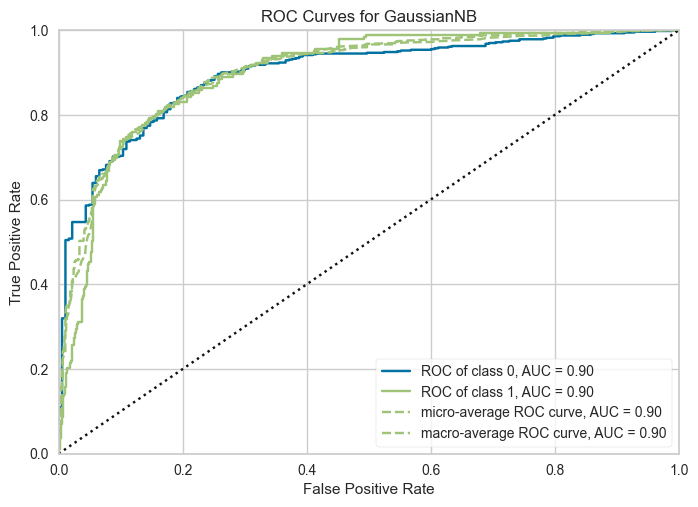

In [10]:
plot_model(nb, plot = 'auc')

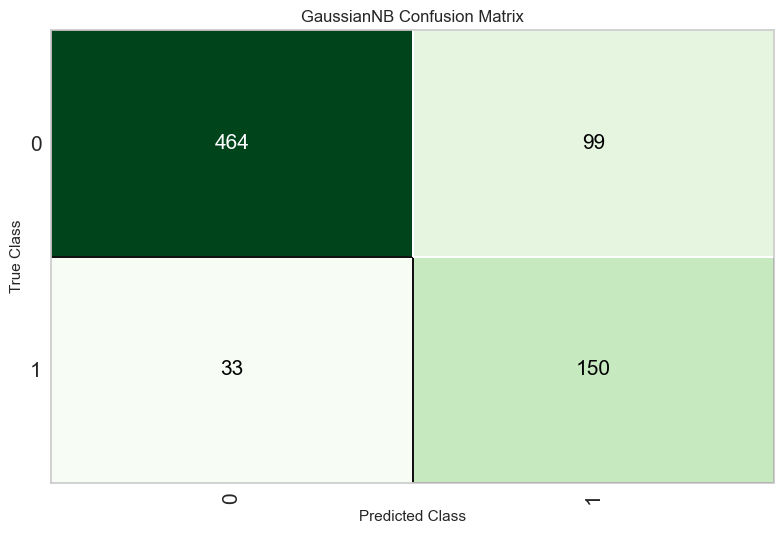

In [11]:
plot_model(nb, plot = 'confusion_matrix')

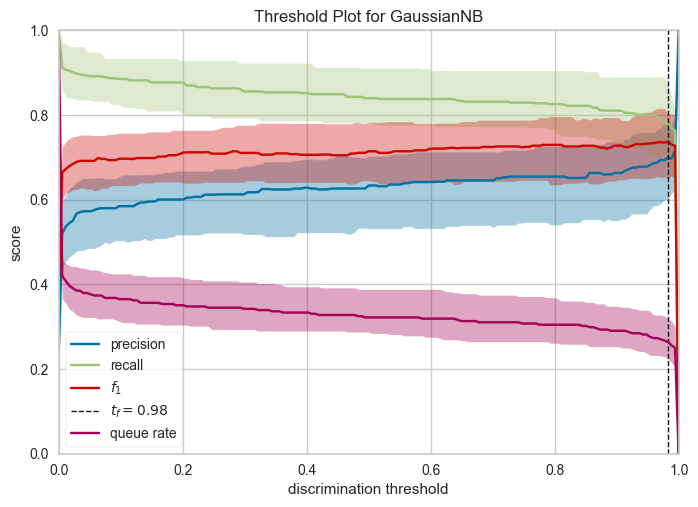

In [12]:
plot_model(nb, plot = 'threshold')

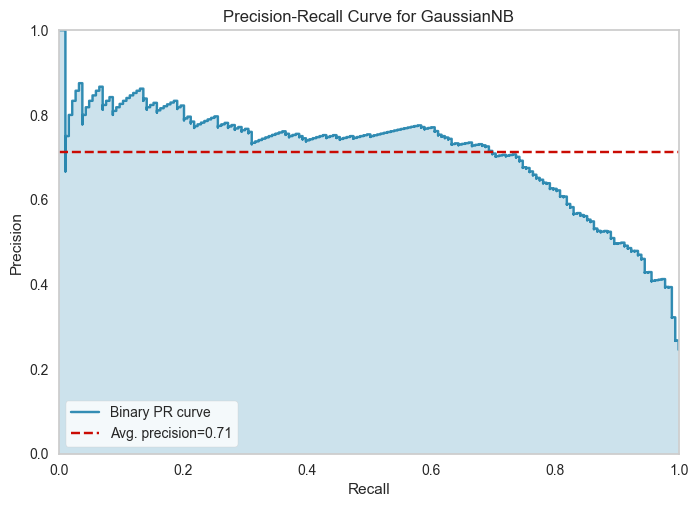

In [13]:
plot_model(nb, plot = 'pr')

In [14]:
y_pred = nb.predict_proba(X)
y_pred = y_pred[:,1]
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [15]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# y_true is the true labels of the data
# y_scores is the predicted probabilities (or scores)
precision, recall, thresholds = precision_recall_curve(y_outer, y_pred)

# Plot the precision-recall curve
plt.rc('axes', labelsize=20) 
plt.rc('axes', titlesize=20)
plt.plot(recall, precision, 'b-',marker='o',markersize=6, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.axis([0, 1, 0, 1])
plt.show()

NameError: name 'y_outer' is not defined

In [16]:
plt.plot(thresholds, precision[:len(thresholds)], label = 'Precision')
plt.plot(thresholds, recall[:len(thresholds)], label = 'Recall')

plt.axvline(0.27, 0, 1, color='gray', linestyle='--', linewidth=2)
plt.text(0.28, 0.3, 'Threshold 0.41(Recall ~90%)')

plt.grid()
plt.legend()
plt.xlabel('Threshold')
plt.show()

NameError: name 'thresholds' is not defined

In [17]:
import math

ths = [0.80, 0.85, 0.90, 0.95, 0.99]
for r, t in reversed(list(zip(recall[:len(thresholds)], thresholds))):
    if ths[0] < r:
        print(f'{int(ths[0]*100)}% recall rate threshold: {round(t, 5):.5f}')
        del ths[0]

NameError: name 'recall' is not defined

In [18]:
from sklearn.metrics import roc_auc_score
print("AUROC: ", roc_auc_score(y_outer, y_pred))

NameError: name 'y_outer' is not defined

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    #plt.title('ROC Curve')
    #plt.legend()
    plt.show()

fper, tper, thresholds = roc_curve(y_outer, y_pred)
plot_roc_curve(fper, tper)

NameError: name 'y_outer' is not defined

In [20]:
y_pred = nb.predict_proba(np.array(vectors))[:,1]

In [21]:
import pandas as pd

threshold = 0.1

df = pd.DataFrame({
    'id':ids,
    'probability':y_pred,
    'answers':labels,
})
df['id'] = df['id'].apply(lambda x: 'ENSP' + str(x).zfill(11))
df['pred'] = (df['probability'] > threshold)*1
df['label'] = ((df['probability'] == 1) | (df['pred']==1)) * 1
df

,id,probability,answers,pred,label
0,ENSP00000229239,9.998974e-01,0,1,1
1,ENSP00000269305,3.422410e-02,0,0,0
2,ENSP00000349960,9.993257e-01,0,1,1
3,ENSP00000451828,9.999615e-01,1,1,1
4,ENSP00000479618,1.217360e-01,0,1,1
...,...,...,...,...,...
19328,ENSP00000481508,6.418778e-08,0,0,0
19329,ENSP00000398454,3.148781e-09,0,0,0
19330,ENSP00000328335,6.165000e-07,0,0,0
19331,ENSP00000294635,2.330256e-08,0,0,0


In [22]:
sum((df['answers'] == 0))

18722

In [23]:
sum((df['answers'] == 0) & (df['pred'] == 0 ))

14743

In [24]:
19333-18722

611

In [25]:
sum((df['answers'] == 0) & (df['pred'] == 1 ))

3979

In [26]:
3979/18722

0.21253071253071254

In [27]:
output = list(df['id'])
with open('ensembl.txt', 'w+') as lf:
    lf.write('\n'.join(output))

In [28]:
df2 = pd.read_excel('ensembl_to_uniprot.xlsx')
df = pd.merge(df, df2, left_on='id', right_on='From', how='left')
df = df.dropna()

In [29]:
df2 = pd.read_csv('mapa_geneid_4_uniprot_crossref.txt', sep='\t')
df = pd.merge(df, df2, left_on='Entry', right_on='UniProtKB', how='left')
df = df.dropna()
# https://www.uniprot.org/id-mapping/uniprotkb/5a5f53f06efca9285947702d505501e5b3e184c5/overview

In [30]:
df

,id,probability,answers,pred,label,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,UniProtKB,GENEID
0,ENSP00000229239,9.998974e-01,0,1,1,ENSP00000229239,P04406,reviewed,G3P_HUMAN,Glyceraldehyde-3-phosphate dehydrogenase (GAPD...,GAPDH GAPD CDABP0047 OK/SW-cl.12,Homo sapiens (Human),335.0,P04406,2597.0
1,ENSP00000269305,3.422410e-02,0,0,0,ENSP00000269305,P04637,reviewed,P53_HUMAN,Cellular tumor antigen p53 (Antigen NY-CO-13) ...,TP53 P53,Homo sapiens (Human),393.0,P04637,7157.0
2,ENSP00000451828,9.999615e-01,1,1,1,ENSP00000451828,P31749,reviewed,AKT1_HUMAN,RAC-alpha serine/threonine-protein kinase (EC ...,AKT1 PKB RAC,Homo sapiens (Human),480.0,P31749,207.0
3,ENSP00000344456,9.086588e-01,1,1,1,ENSP00000344456,P35222,reviewed,CTNB1_HUMAN,Catenin beta-1 (Beta-catenin),CTNNB1 CTNNB OK/SW-cl.35 PRO2286,Homo sapiens (Human),781.0,P35222,1499.0
4,ENSP00000295897,1.000000e+00,1,1,1,ENSP00000295897,P02768,reviewed,ALBU_HUMAN,Albumin,ALB GIG20 GIG42 PRO0903 PRO1708 PRO2044 PRO261...,Homo sapiens (Human),609.0,P02768,213.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19041,ENSP00000323821,1.854085e-07,0,0,0,ENSP00000323821,Q3ZCU0,reviewed,GVQW3_HUMAN,Protein GVQW3 (GVQW motif-containing protein 3),GVQW3,Homo sapiens (Human),254.0,Q3ZCU0,100506127.0
19045,ENSP00000409318,3.448124e-06,0,0,0,ENSP00000409318,Q9UIE0,reviewed,ZN230_HUMAN,Zinc finger protein 230 (Zinc finger protein F...,ZNF230 FDZF2,Homo sapiens (Human),474.0,Q9UIE0,7773.0
19049,ENSP00000369959,3.013328e-07,0,0,0,ENSP00000369959,Q8WW34,reviewed,TM239_HUMAN,Transmembrane protein 239,TMEM239,Homo sapiens (Human),195.0,Q8WW34,100288797.0
19053,ENSP00000290881,1.250502e-08,0,0,0,ENSP00000290881,Q68EN5,reviewed,MACA1_HUMAN,Microtubule-associated tyrosine carboxypeptida...,MATCAP1 KIAA0895L MATCAP,Homo sapiens (Human),471.0,Q68EN5,653319.0


In [31]:
sum((df['answers'] == 0))

15858

In [32]:
sum((df['answers'] == 1))

604

In [33]:
# number of potential targets
sum((df['answers'] == 0) & (df['pred'] == 1 ))

3617

In [34]:
sum((df['label'] == 1))

4146

In [35]:
import sqlite3

conn = sqlite3.connect('disgenet_2020.db')
c = conn.cursor()

c.execute("SELECT name FROM sqlite_master WHERE type='table';")

tables = c.fetchall()

for table in tables:
    print(table[0])

conn.close()

diseaseAttributes
diseaseClass
disease2class
geneAttributes
geneDiseaseNetwork
variantAttributes
variantGene
variantDiseaseNetwork


In [36]:
import sqlite3
print(sqlite3.version)
print(sqlite3.sqlite_version)
import pandas as pd
conn = sqlite3.connect("disgenet_2020.db", isolation_level=None)
c = conn.cursor()

gd = pd.read_sql("select * from geneDiseaseNetwork;", conn)
gd.to_csv("gene_disease_network.csv")

2.6.0
3.44.2


In [37]:
gd = pd.read_csv("gene_disease_network.csv")
gd = gd[['NID','diseaseNID','geneNID']]
gd

,NID,diseaseNID,geneNID
0,1130681,2107,793
1,261998,431,775
2,369637,450,775
3,2128526,10033,775
4,262799,431,7385
...,...,...,...
3261319,3261082,30235,1698
3261320,3261111,30244,4952
3261321,3261162,30255,5756
3261322,3261163,30255,5756


In [38]:
import sqlite3
da = pd.read_sql("select * from diseaseAttributes;", conn)
da

,diseaseNID,diseaseId,diseaseName,type
0,1,C0000727,"Abdomen, Acute",phenotype
1,2,C0000729,Abdominal Cramps,phenotype
2,3,C0000731,Abdomen distended,phenotype
3,4,C0000734,Abdominal mass,phenotype
4,5,C0000735,Abdominal Neoplasms,group
...,...,...,...,...
30288,30289,C4755314,Autosomal recessive cutis laxa type 2B,disease
30289,30290,C4757950,Isolated ATP synthase deficiency,disease
30290,30291,C4757951,Desmoplastic infantile astrocytoma and ganglio...,disease
30291,30292,C4759295,Non-metastatic prostate cancer,disease


In [39]:
ga = pd.read_sql("select * from geneAttributes;", conn)
ga

,geneNID,geneId,geneName,geneDescription,pLI,DSI,DPI
0,1,1,A1BG,alpha-1-B glycoprotein,4.991700e-09,0.700,0.538
1,2,2,A2M,alpha-2-macroglobulin,4.522900e-11,0.529,0.769
2,3,3,A2MP1,alpha-2-macroglobulin pseudogene 1,NaN,NaN,NaN
3,4,9,NAT1,N-acetyltransferase 1,1.929400e-14,0.536,0.846
4,5,10,NAT2,N-acetyltransferase 2,3.274400e-06,0.451,0.885
...,...,...,...,...,...,...,...
26132,26133,115482722,H3P33,H3 histone pseudogene 33,NaN,0.736,0.346
26133,26134,115482723,H3P40,H3 histone pseudogene 40,NaN,0.506,0.846
26134,26135,115561815,LNC-LBCS,"lncRNA bladder and prostate cancer suppressor,...",NaN,0.890,0.077
26135,26136,115804232,CEROX1,cytoplasmic endogenous regulator of oxidative ...,NaN,NaN,NaN


In [40]:
df_nid = pd.merge(df, ga, left_on='GENEID', right_on='geneId', how='left')
df_nid

,id,probability,answers,pred,label,From,Entry,Reviewed,Entry Name,Protein names,...,Length,UniProtKB,GENEID,geneNID,geneId,geneName,geneDescription,pLI,DSI,DPI
0,ENSP00000229239,9.998974e-01,0,1,1,ENSP00000229239,P04406,reviewed,G3P_HUMAN,Glyceraldehyde-3-phosphate dehydrogenase (GAPD...,...,335.0,P04406,2597.0,1862,2597,GAPDH,glyceraldehyde-3-phosphate dehydrogenase,0.113880,0.447,0.808
1,ENSP00000269305,3.422410e-02,0,0,0,ENSP00000269305,P04637,reviewed,P53_HUMAN,Cellular tumor antigen p53 (Antigen NY-CO-13) ...,...,393.0,P04637,7157.0,5241,7157,TP53,tumor protein p53,0.532350,0.236,0.962
2,ENSP00000451828,9.999615e-01,1,1,1,ENSP00000451828,P31749,reviewed,AKT1_HUMAN,RAC-alpha serine/threonine-protein kinase (EC ...,...,480.0,P31749,207.0,151,207,AKT1,AKT serine/threonine kinase 1,0.975900,0.311,0.962
3,ENSP00000344456,9.086588e-01,1,1,1,ENSP00000344456,P35222,reviewed,CTNB1_HUMAN,Catenin beta-1 (Beta-catenin),...,781.0,P35222,1499.0,1115,1499,CTNNB1,catenin beta 1,0.999990,0.303,0.885
4,ENSP00000295897,1.000000e+00,1,1,1,ENSP00000295897,P02768,reviewed,ALBU_HUMAN,Albumin,...,609.0,P02768,213.0,156,213,ALB,albumin,0.643290,0.317,0.962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16457,ENSP00000323821,1.854085e-07,0,0,0,ENSP00000323821,Q3ZCU0,reviewed,GVQW3_HUMAN,Protein GVQW3 (GVQW motif-containing protein 3),...,254.0,Q3ZCU0,100506127.0,20771,100506127,GVQW3,GVQW motif containing 3,0.004962,NaN,NaN
16458,ENSP00000409318,3.448124e-06,0,0,0,ENSP00000409318,Q9UIE0,reviewed,ZN230_HUMAN,Zinc finger protein 230 (Zinc finger protein F...,...,474.0,Q9UIE0,7773.0,5615,7773,ZNF230,zinc finger protein 230,0.083152,0.931,0.192
16459,ENSP00000369959,3.013328e-07,0,0,0,ENSP00000369959,Q8WW34,reviewed,TM239_HUMAN,Transmembrane protein 239,...,195.0,Q8WW34,100288797.0,20247,100288797,TMEM239,transmembrane protein 239,0.000816,NaN,NaN
16460,ENSP00000290881,1.250502e-08,0,0,0,ENSP00000290881,Q68EN5,reviewed,MACA1_HUMAN,Microtubule-associated tyrosine carboxypeptida...,...,471.0,Q68EN5,653319.0,19245,653319,KIAA0895L,KIAA0895 like,0.001940,NaN,NaN


In [41]:
dfm = pd.merge(df_nid, gd, on='geneNID', how='right')
dfm = dfm.dropna()
dfm = pd.merge(dfm, da, on='diseaseNID', how='left')

In [42]:
# dfm[['id','probability','label','Entry','Protein names','UniProtKB','geneName','diseaseName']].dropna().to_csv('targets_inference_complete.csv', compression='gzip')
dfm[['probability','Protein names','UniProtKB','geneName','diseaseName']].dropna().to_csv('targets_inference_complete.csv', index=False, compression='gzip')

In [43]:
len(set(dfm[dfm['label']==1]['diseaseName']))

23363

In [44]:
keyword = "Obesity"

result = [string for string in set(dfm[dfm['label']==1]['diseaseName']) if keyword in string]

print(result)

['Obesity, Visceral', 'Wilms Tumor, Aniridia, Genitourinary Anomalies, Mental Retardation, and Obesity Syndrome', 'Obesity', 'Monogenic Obesity', 'Obesity, Hyperphagia, and Developmental Delay', 'Infantile Obesity', 'Obesity Related Glomerulopathy', 'Obesity, Morbid', 'Obesity due to melanocortin 4 receptor deficiency', 'Obesity, Abdominal', 'Obesity, Metabolically Benign', 'Obesity cardiomyopathy', 'Obesity hypoventilation syndrome (OHS)', 'Adolescent Obesity', 'Pediatric Obesity', 'Obesity-Associated Insulin Resistance', 'Obesity in animals']


In [45]:
diseaseName = 'Obesity'

In [46]:
output = dfm[dfm['label']==1][dfm['diseaseName']==diseaseName].sort_values('probability', ascending=False)
output = output[['id', 'probability', 'answers', 'pred', 'label', 'Entry', 'Protein names', 'UniProtKB', 'geneName']]
output = output.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)
output

,id,probability,answers,pred,label,Entry,Protein names,UniProtKB,geneName
0,ENSP00000293330,1.000000,0.0,1.0,1.0,O43612,Hypocretin neuropeptide precursor (Hypocretin)...,O43612,HCRT
1,ENSP00000336630,1.000000,1.0,1.0,1.0,P29274,Adenosine receptor A2a,P29274,ADORA2A
2,ENSP00000356213,1.000000,0.0,1.0,1.0,P01282,VIP peptides [Cleaved into: Intestinal peptide...,P01282,VIP
3,ENSP00000321106,1.000000,0.0,1.0,1.0,P20366,Protachykinin-1 (PPT) [Cleaved into: Substance...,P20366,TAC1
4,ENSP00000384364,1.000000,0.0,1.0,1.0,P01303,Pro-neuropeptide Y [Cleaved into: Neuropeptide...,P01303,NPY
...,...,...,...,...,...,...,...,...,...
1435,ENSP00000323588,0.106902,0.0,1.0,1.0,P48431,Transcription factor SOX-2,P48431,SOX2
1436,ENSP00000331745,0.105944,0.0,1.0,1.0,Q9NR23,Growth/differentiation factor 3 (GDF-3),Q9NR23,GDF3
1437,ENSP00000266066,0.105087,0.0,1.0,1.0,Q5T4F7,Secreted frizzled-related protein 5 (sFRP-5) (...,Q5T4F7,SFRP5
1438,ENSP00000262719,0.103564,0.0,1.0,1.0,O60346,PH domain leucine-rich repeat-containing prote...,O60346,PHLPP1


In [47]:
output.to_csv(f'{diseaseName}.csv')

In [48]:
output.head(10)

,id,probability,answers,pred,label,Entry,Protein names,UniProtKB,geneName
0,ENSP00000293330,1.0,0.0,1.0,1.0,O43612,Hypocretin neuropeptide precursor (Hypocretin)...,O43612,HCRT
1,ENSP00000336630,1.0,1.0,1.0,1.0,P29274,Adenosine receptor A2a,P29274,ADORA2A
2,ENSP00000356213,1.0,0.0,1.0,1.0,P01282,VIP peptides [Cleaved into: Intestinal peptide...,P01282,VIP
3,ENSP00000321106,1.0,0.0,1.0,1.0,P20366,Protachykinin-1 (PPT) [Cleaved into: Substance...,P20366,TAC1
4,ENSP00000384364,1.0,0.0,1.0,1.0,P01303,Pro-neuropeptide Y [Cleaved into: Neuropeptide...,P01303,NPY
5,ENSP00000276571,1.0,0.0,1.0,1.0,P06850,Corticoliberin (Corticotropin-releasing factor...,P06850,CRH
6,ENSP00000437737,1.0,1.0,1.0,1.0,P28223,5-hydroxytryptamine receptor 2A (5-HT-2) (5-HT...,P28223,HTR2A
7,ENSP00000369647,1.0,0.0,1.0,1.0,P01185,Vasopressin-neurophysin 2-copeptin (AVP-NPII) ...,P01185,AVP
8,ENSP00000461007,1.0,1.0,1.0,1.0,Q8NER1,Transient receptor potential cation channel su...,Q8NER1,TRPV1
9,ENSP00000256857,1.0,0.0,1.0,1.0,P07492,Gastrin-releasing peptide (GRP) [Cleaved into:...,P07492,GRP


In [49]:
dfm[dfm['diseaseName']==diseaseName].sort_values('probability', ascending=False)

,id,probability,answers,pred,label,From,Entry,Reviewed,Entry Name,Protein names,...,geneName,geneDescription,pLI,DSI,DPI,NID,diseaseNID,diseaseId,diseaseName,type
91062,ENSP00000293330,1.000000e+00,0.0,1.0,1.0,ENSP00000293330,O43612,reviewed,OREX_HUMAN,Hypocretin neuropeptide precursor (Hypocretin)...,...,HCRT,hypocretin neuropeptide precursor,2.877400e-02,0.500,0.808,1321776,2182,C0028754,Obesity,disease
1888342,ENSP00000293330,1.000000e+00,0.0,1.0,1.0,ENSP00000293330,O43612,reviewed,OREX_HUMAN,Hypocretin neuropeptide precursor (Hypocretin)...,...,HCRT,hypocretin neuropeptide precursor,2.877400e-02,0.500,0.808,1321788,2182,C0028754,Obesity,disease
1757342,ENSP00000293330,1.000000e+00,0.0,1.0,1.0,ENSP00000293330,O43612,reviewed,OREX_HUMAN,Hypocretin neuropeptide precursor (Hypocretin)...,...,HCRT,hypocretin neuropeptide precursor,2.877400e-02,0.500,0.808,1321774,2182,C0028754,Obesity,disease
168969,ENSP00000293330,1.000000e+00,0.0,1.0,1.0,ENSP00000293330,O43612,reviewed,OREX_HUMAN,Hypocretin neuropeptide precursor (Hypocretin)...,...,HCRT,hypocretin neuropeptide precursor,2.877400e-02,0.500,0.808,1321772,2182,C0028754,Obesity,disease
2700693,ENSP00000293330,1.000000e+00,0.0,1.0,1.0,ENSP00000293330,O43612,reviewed,OREX_HUMAN,Hypocretin neuropeptide precursor (Hypocretin)...,...,HCRT,hypocretin neuropeptide precursor,2.877400e-02,0.500,0.808,1321771,2182,C0028754,Obesity,disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2406359,ENSP00000409964,2.858200e-19,0.0,0.0,0.0,ENSP00000409964,Q9P2B7,reviewed,CFA97_HUMAN,Cilia- and flagella-associated protein 97,...,CFAP97,cilia and flagella associated protein 97,1.046900e-04,0.638,0.769,1326951,2182,C0028754,Obesity,disease
1539666,ENSP00000409964,2.858200e-19,0.0,0.0,0.0,ENSP00000409964,Q9P2B7,reviewed,CFA97_HUMAN,Cilia- and flagella-associated protein 97,...,CFAP97,cilia and flagella associated protein 97,1.046900e-04,0.638,0.769,1326952,2182,C0028754,Obesity,disease
545773,ENSP00000326652,7.495244e-20,0.0,0.0,0.0,ENSP00000326652,Q96KD3,reviewed,GAR1B_HUMAN,Golgi-associated RAB2 interactor protein 1B (T...,...,FAM71F1,family with sequence similarity 71 member F1,1.045700e-07,1.000,0.077,1329878,2182,C0028754,Obesity,disease
2166387,ENSP00000326652,7.495244e-20,0.0,0.0,0.0,ENSP00000326652,Q96KD3,reviewed,GAR1B_HUMAN,Golgi-associated RAB2 interactor protein 1B (T...,...,FAM71F1,family with sequence similarity 71 member F1,1.045700e-07,1.000,0.077,1329880,2182,C0028754,Obesity,disease


In [50]:
df_crop = df[['id', 'Entry Name', 'Protein names', 'Gene Names']].drop_duplicates()
df_crop = df_crop.reset_index(drop=True)

In [51]:
df_crop['Protein names']

0        Glyceraldehyde-3-phosphate dehydrogenase (GAPD...
1        Cellular tumor antigen p53 (Antigen NY-CO-13) ...
2        RAC-alpha serine/threonine-protein kinase (EC ...
3                            Catenin beta-1 (Beta-catenin)
4                                                  Albumin
                               ...                        
15789      Protein GVQW3 (GVQW motif-containing protein 3)
15790    Zinc finger protein 230 (Zinc finger protein F...
15791                            Transmembrane protein 239
15792    Microtubule-associated tyrosine carboxypeptida...
15793                   Small integral membrane protein 10
Name: Protein names, Length: 15794, dtype: object

In [52]:
con2 = 'nuclear protein'
df_crop[df_crop['Protein names'].str.contains(con2)].reset_index(drop=True)

,id,Entry Name,Protein names,Gene Names
0,ENSP00000383949,NH2L1_HUMAN,NHP2-like protein 1 (High mobility group-like ...,SNU13 NHP2L1
1,ENSP00000446215,RAN_HUMAN,GTP-binding nuclear protein Ran (EC 3.6.5.-) (...,RAN ARA24 OK/SW-cl.81
2,ENSP00000362441,ATRX_HUMAN,Transcriptional regulator ATRX (EC 3.6.4.12) (...,ATRX RAD54L XH2
3,ENSP00000365439,HNRPK_HUMAN,Heterogeneous nuclear ribonucleoprotein K (hnR...,HNRNPK HNRPK
4,ENSP00000483484,NSA2_HUMAN,Ribosome biogenesis protein NSA2 homolog (Hair...,NSA2 TINP1 HUSSY-29
5,ENSP00000356448,TPR_HUMAN,Nucleoprotein TPR (Megator) (NPC-associated in...,TPR
6,ENSP00000216727,PABP2_HUMAN,Polyadenylate-binding protein 2 (PABP-2) (Poly...,PABPN1 PAB2 PABP2
7,ENSP00000386134,NGDN_HUMAN,Neuroguidin (Centromere accumulated nuclear pr...,NGDN C14orf120
8,ENSP00000276079,NONO_HUMAN,Non-POU domain-containing octamer-binding prot...,NONO NRB54
9,ENSP00000417464,RRP1_HUMAN,Ribosomal RNA processing protein 1 homolog A (...,RRP1 D21S2056E NNP1 NOP52 RRP1A


In [53]:
from matplotlib.pyplot import style
style.use('default')

growth factor receptor : 32
nuclear protein : 40


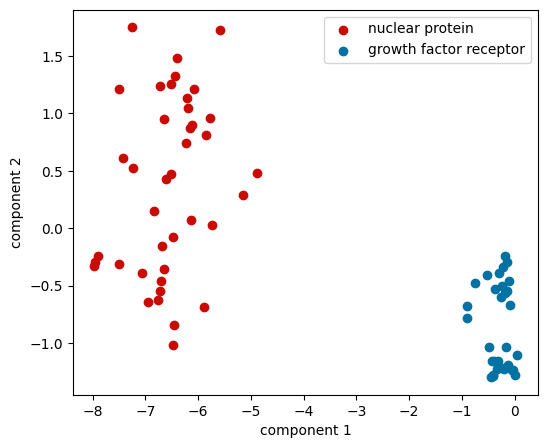

In [54]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

con1 = 'growth factor receptor'
con2 = 'nuclear protein'

df_dehydrogenase = df_crop[df_crop['Protein names'].str.contains(con1)].reset_index(drop=True)
df_kinase = df_crop[df_crop['Protein names'].str.contains(con2)].reset_index(drop=True)

df_dehydrogenase.to_csv(f'{con1}.csv')
df_kinase.to_csv(f'{con2}.csv')

print(con1, ":", len(df_dehydrogenase))
print(con2, ":", len(df_kinase))


df_kinase['n'] = df_kinase['id'].str.extract('ENSP(\d+)').astype(int)
df_dehydrogenase['n'] = df_dehydrogenase['id'].str.extract('ENSP(\d+)').astype(int)


X_kinase = list(df_kinase['n'].map(lambda x: list(key2val[x])))
X_dehydrogenase = list(df_dehydrogenase['n'].map(lambda x: list(key2val[x])))

X_kinase = np.array(X_kinase)
X_dehydrogenase = np.array(X_dehydrogenase)


tsne = TSNE(n_components=2, random_state=2)
X_kinase_2D = tsne.fit_transform(X_kinase)
X_dehydrogenase_2D = tsne.fit_transform(X_dehydrogenase)

plt.figure(figsize=(6, 5))
colors = ['r', 'b']
for i, x in enumerate([X_kinase_2D, X_dehydrogenase_2D]):
    plt.scatter(x[:, 0], x[:, 1], c=colors[i])
#plt.title('t-SNE')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.legend([con2, con1])
plt.show()

In [55]:
df_dehydrogenase

,id,Entry Name,Protein names,Gene Names,n
0,ENSP00000275493,EGFR_HUMAN,Epidermal growth factor receptor (EC 2.7.10.1)...,EGFR ERBB ERBB1 HER1,275493
1,ENSP00000288135,KIT_HUMAN,Mast/stem cell growth factor receptor Kit (SCF...,KIT SCFR,288135
2,ENSP00000263923,VGFR2_HUMAN,Vascular endothelial growth factor receptor 2 ...,KDR FLK1 VEGFR2,263923
3,ENSP00000431418,NTRK1_HUMAN,High affinity nerve growth factor receptor (EC...,NTRK1 MTC TRK TRKA,431418
4,ENSP00000317272,MET_HUMAN,Hepatocyte growth factor receptor (HGF recepto...,MET,317272
5,ENSP00000261799,PGFRB_HUMAN,Platelet-derived growth factor receptor beta (...,PDGFRB PDGFR PDGFR1,261799
6,ENSP00000257290,PGFRA_HUMAN,Platelet-derived growth factor receptor alpha ...,PDGFRA PDGFR2 RHEPDGFRA,257290
7,ENSP00000410294,FGFR2_HUMAN,Fibroblast growth factor receptor 2 (FGFR-2) (...,FGFR2 BEK KGFR KSAM,410294
8,ENSP00000282397,VGFR1_HUMAN,Vascular endothelial growth factor receptor 1 ...,FLT1 FLT FRT VEGFR1,282397
9,ENSP00000360798,EPS15_HUMAN,Epidermal growth factor receptor substrate 15 ...,EPS15 AF1P,360798


In [56]:
df_kinase

,id,Entry Name,Protein names,Gene Names,n
0,ENSP00000383949,NH2L1_HUMAN,NHP2-like protein 1 (High mobility group-like ...,SNU13 NHP2L1,383949
1,ENSP00000446215,RAN_HUMAN,GTP-binding nuclear protein Ran (EC 3.6.5.-) (...,RAN ARA24 OK/SW-cl.81,446215
2,ENSP00000362441,ATRX_HUMAN,Transcriptional regulator ATRX (EC 3.6.4.12) (...,ATRX RAD54L XH2,362441
3,ENSP00000365439,HNRPK_HUMAN,Heterogeneous nuclear ribonucleoprotein K (hnR...,HNRNPK HNRPK,365439
4,ENSP00000483484,NSA2_HUMAN,Ribosome biogenesis protein NSA2 homolog (Hair...,NSA2 TINP1 HUSSY-29,483484
5,ENSP00000356448,TPR_HUMAN,Nucleoprotein TPR (Megator) (NPC-associated in...,TPR,356448
6,ENSP00000216727,PABP2_HUMAN,Polyadenylate-binding protein 2 (PABP-2) (Poly...,PABPN1 PAB2 PABP2,216727
7,ENSP00000386134,NGDN_HUMAN,Neuroguidin (Centromere accumulated nuclear pr...,NGDN C14orf120,386134
8,ENSP00000276079,NONO_HUMAN,Non-POU domain-containing octamer-binding prot...,NONO NRB54,276079
9,ENSP00000417464,RRP1_HUMAN,Ribosomal RNA processing protein 1 homolog A (...,RRP1 D21S2056E NNP1 NOP52 RRP1A,417464


G protein : 53
kinase : 798


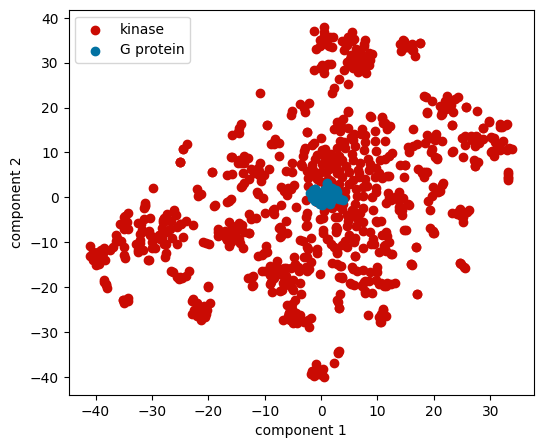

In [57]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

con1 = 'G protein'
con2 = 'kinase'

df_dehydrogenase = df_crop[df_crop['Protein names'].str.contains(con1)].reset_index(drop=True)
df_kinase = df_crop[df_crop['Protein names'].str.contains(con2)].reset_index(drop=True)

df_dehydrogenase = df_dehydrogenase[~df_dehydrogenase['id'].isin(df_kinase['id'])]

df_dehydrogenase.to_csv(f'{con1}.csv')
df_kinase.to_csv(f'{con2}.csv')

print(con1, ":", len(df_dehydrogenase))
print(con2, ":", len(df_kinase))


df_kinase['n'] = df_kinase['id'].str.extract('ENSP(\d+)').astype(int)
df_dehydrogenase['n'] = df_dehydrogenase['id'].str.extract('ENSP(\d+)').astype(int)


X_kinase = list(df_kinase['n'].map(lambda x: list(key2val[x])))
X_dehydrogenase = list(df_dehydrogenase['n'].map(lambda x: list(key2val[x])))

X_kinase = np.array(X_kinase)
X_dehydrogenase = np.array(X_dehydrogenase)


tsne = TSNE(n_components=2, random_state=0)
X_kinase_2D = tsne.fit_transform(X_kinase)
X_dehydrogenase_2D = tsne.fit_transform(X_dehydrogenase)


plt.figure(figsize=(6, 5))
colors = ['r', 'b']
for i, x in enumerate([X_kinase_2D, X_dehydrogenase_2D]):
    plt.scatter(x[:, 0], x[:, 1], c=colors[i])
#plt.title('t-SNE')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.legend([con2, con1])
plt.show()

growth factor receptor : 32
nuclear protein : 40
G protein : 60
kinase : 798


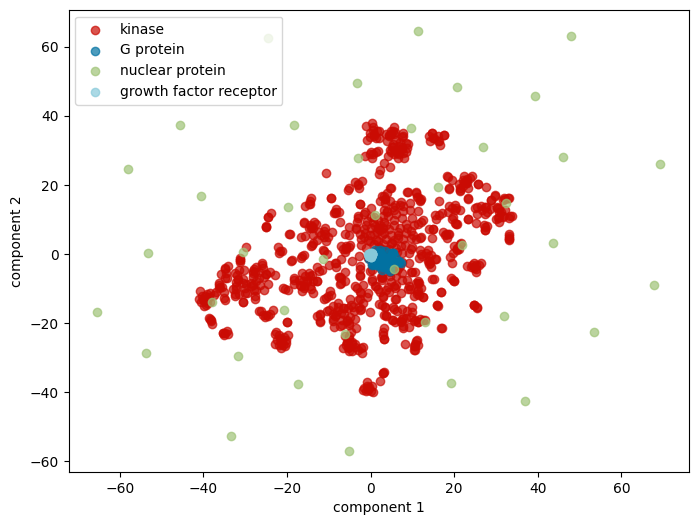

In [58]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

conditions = ['growth factor receptor', 'nuclear protein', 'G protein', 'kinase']
df_list = []

for con in conditions:
    df_temp = df_crop[df_crop['Protein names'].str.contains(con)].reset_index(drop=True)
    df_temp.to_csv(f'{con}.csv')
    print(con, ":", len(df_temp))
    df_list.append(df_temp)


df_list.sort(key=len, reverse=True)
conditions.sort(key=lambda x: len(df_crop[df_crop['Protein names'].str.contains(x)]), reverse=True)


for df in df_list:
    df['n'] = df['id'].str.extract('ENSP(\\d+)').astype(int)


X_list = []
for df in df_list:
    X_temp = list(df['n'].map(lambda x: list(key2val[x])))
    X_temp = np.array(X_temp)
    X_list.append(X_temp)


tsne = TSNE(n_components=2, random_state=0)
X_2D_list = []
for X in X_list:
    X_2D = tsne.fit_transform(X)
    X_2D_list.append(X_2D)


plt.figure(figsize=(8, 6))
colors = ['r', 'b', 'g', 'c']
for i, x in enumerate(X_2D_list):
    plt.scatter(x[:, 0], x[:, 1], c=colors[i], alpha=0.7)

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.legend(conditions)
plt.show()